#  Module : Knowledge Discovery 1 & Text Mining  
##  Devoir Obligatoire – Projet de Sentiment Analysis

---

###  Sujet : Entraînement et évaluation d’un modèle de prédiction de sentiment à partir d’un dataset Kaggle


###  Étudiant : DECHRAOUI Mohammed 
###  Filière : M2SI
###  Année Universitaire : 2024 / 2025  


##  Étape 1 : Chargement des Données

Dans cette étape, les jeux de données d’entraînement (`train.csv`) et de test (`test.csv`) ont été chargés directement depuis Kaggle à l’aide de la bibliothèque `kagglehub`.  


Ensuite :
- Les deux jeux de données ont été fusionnés pour ne former qu’un seul dataframe.
- Seules les colonnes `text` et `sentiment` ont été conservées.
- Les lignes contenant des valeurs manquantes ont été supprimées.

Enfin, nous avons affiché le nombre total d’exemples disponibles ainsi qu’un aperçu des premières lignes du dataset consolidé.


In [1]:
import kagglehub
import pandas as pd



# Chargement du fichier d'entraînement depuis Kaggle
train_path = kagglehub.dataset_download('abhi8923shriv/sentiment-analysis-dataset')
test_path = kagglehub.dataset_download('guisira/cu-cedt-sentiment-analysis-testset')


train_df = pd.read_csv(train_path + '/train.csv', encoding="latin1")
test_df = pd.read_csv(test_path + '/sentiment_analysis_dataset.csv')

# On a concaténé les dataframes train et test pour avoir une seule dataset à traiter une fois pour toute
df = pd.concat([train_df, test_df], ignore_index=True)

# Là on sélectionne les colonnes utiles 'text' et 'sentiment' ,et supprime les valeurs manquantes
df = df[['text', 'sentiment']].dropna()

# Ici on affiche la taille du dataframe et les premières lignes
print("Nombre total d'exemples:", len(df))
print(df.head())


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Nombre total d'exemples: 27480
                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


## Étape 2 – Suppression des Stopwords

Les *stopwords* (mots outils ou mots vides) représentent des termes très fréquents dans une langue qui, en général, n’apportent pas d'information discriminante dans le cadre d’une analyse de sentiment.  
Dans cette étape, la liste des stopwords en anglais fournie par la bibliothèque **NLTK** a été utilisée.

Nous avons procédé à :
- La récupération de l’ensemble des stopwords en anglais
- La visualisation du nombre total de mots identifiés
- L’illustration par quelques exemples représentatifs


In [2]:
!python -m spacy download en_core_web_sm --quiet
%pip install wordcloud spacy nltk kagglehub --quiet


from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Chargement de l'ensemble des stopwords en anglais depuis NLTK
stop_words = set(stopwords.words('english'))

# Exploration et affichage du nombre total de stopwords et de quelques exemples
print(f"Nombre de stopwords NLTK : {len(stop_words)}")
print(f"Exemples de stopwords : {list(stop_words)[:20]}")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Nombre de stopwords NLTK : 198
Exemples de stopwords : ['now', "you'd", 'does', 'the', "shan't", 'above', 'been', "aren't", "you've", 'hers', "mustn't", 'ma', 'do', 'themselves', 'they', "they'd", 'shan', 'we', 'out', "won't"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Étape 3 – Illustration de la Tokenisation

La tokenisation est une étape fondamentale du traitement automatique du langage naturel (TALN). Elle permet de décomposer un texte brut en unités linguistiques de base appelées *tokens* (mots, ponctuations, symboles, etc.).

Dans cette section, un exemple de phrase extraite du corpus a été utilisé pour :
- Comparer une tokenisation rudimentaire via `split()` (qui ne tient compte que des espaces),
- Et une tokenisation plus fine réalisée à l’aide de `WordPunctTokenizer` (NLTK), capable de dissocier correctement la ponctuation.

Ce contraste souligne l’intérêt d’utiliser des méthodes spécialisées pour une analyse plus précise du langage.


In [3]:
from nltk.tokenize import WordPunctTokenizer


# D'abord, on initialise le tokenizer WordPunct
tokenizer = WordPunctTokenizer()

# Puis, on sélectionne un exemple de texte depuis le DataFrame
example_text = df['text'].iloc[0]
print(f"Texte brut exemple : {example_text}")

# Ensuite, on compare la tokenisation obtenue avec split() et avec WordPunctTokenizer
tokens_split = example_text.split()
tokens_wp = tokenizer.tokenize(example_text)

print("\n Tokenisation avec split() :")
print(tokens_split)

print("\n Tokenisation avec WordPunctTokenizer :")
print(tokens_wp)



Texte brut exemple :  I`d have responded, if I were going

 Tokenisation avec split() :
['I`d', 'have', 'responded,', 'if', 'I', 'were', 'going']

 Tokenisation avec WordPunctTokenizer :
['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going']


## Étape 4 : Suppression des Stopwords sur l'Exemple

Après avoir tokenisé le texte d'exemple avec `WordPunctTokenizer`, on a appliqué la suppression des stopwords. On a parcouru la liste des tokens, on les a convertis en minuscules, et on a gardé uniquement ceux qui ne figuraient pas dans notre ensemble `stop_words` défini précédemment. On a affiché la liste des tokens résultante.


In [4]:
# Là on filtre les tokens de l'exemple afin de supprimer les stopwords (après conversion en minuscules)
tokens_filtered = [t.lower() for t in tokens_wp if t.lower() not in stop_words]

# Puis, on affiche les tokens restants
print("Tokens après suppression des stopwords :")
print(tokens_filtered)


Tokens après suppression des stopwords :
['`', 'responded', ',', 'going']


## Étape 5 : Stemming sur l'Exemple

Le stemming est une technique de normalisation du texte qui réduit les mots à leur racine ou base (le "stem"). Par exemple, 'running', 'ran', 'runs' pourraient être réduits à 'run'. Ici, on a utilisé le `PorterStemmer` de NLTK sur les tokens filtrés (sans stopwords) de notre exemple. On a affiché les tokens après l'application du stemming.


In [5]:
from nltk.stem import PorterStemmer

# ici, on initialise le PorterStemmer
stemmer = PorterStemmer()

# Ensuite, on applique le stemming sur les tokens filtrés de l’exemple
tokens_stemmed = [stemmer.stem(token) for token in tokens_filtered]

# Puis, on affiche les tokens après l’étape de stemming
print("Tokens après stemming :")
print(tokens_stemmed)



Tokens après stemming :
['`', 'respond', ',', 'go']


## Étape 6 : Fonction de Nettoyage Complète

On a regroupé toutes les étapes de prétraitement (mise en minuscule, suppression des URLs, suppression des caractères non alphabétiques, tokenisation, suppression des stopwords, stemming) dans une seule fonction `preprocess_text`. On a ensuite appliqué cette fonction à toute la colonne 'text' de notre dataframe pour créer une nouvelle colonne 'clean_text' contenant le texte nettoyé. On a affiché les premières lignes pour comparer le texte original et le texte nettoyé.


In [6]:
import re
# Cette fonction regroupe toutes les étapes de prétraitement du texte
def preprocess_text(text):
    # D'abord on met le texte en minuscules
    text = text.lower()
    # On supprime les URLs
    text = re.sub(r"http\S+", "", text)
    # On conserve uniquement les lettres et les apostrophes
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # On tokenize le texte
    tokens = tokenizer.tokenize(text)
    # On supprime les stopwords et on applique le stemming
    filtered_tokens = [stemmer.stem(w) for w in tokens if w.lower() not in stop_words]
    # On reconstitue le texte nettoyé
    return " ".join(filtered_tokens)

# On applique la fonction à toute la colonne 'text'
df['clean_text'] = df['text'].apply(preprocess_text)

# On affiche un aperçu du résultat
print("\n Exemple de texte nettoyé :")
print(df[['text', 'clean_text']].head())



 Exemple de texte nettoyé :
                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                      clean_text  
0                     respond go  
1        sooo sad miss san diego  
2                     boss bulli  
3            interview leav alon  
4  son put releas alreadi bought  


## Étape 7 : Nuage de Mots

Pour visualiser les mots les plus fréquents dans l'ensemble du corpus après nettoyage, on a créé un nuage de mots. On a d'abord concaténé tous les textes nettoyés en une seule grande chaîne de caractères. Ensuite, on a utilisé la bibliothèque `WordCloud` pour générer l'image du nuage, où la taille de chaque mot est proportionnelle à sa fréquence. Enfin, on a affiché le nuage de mots à l'aide de `matplotlib`.


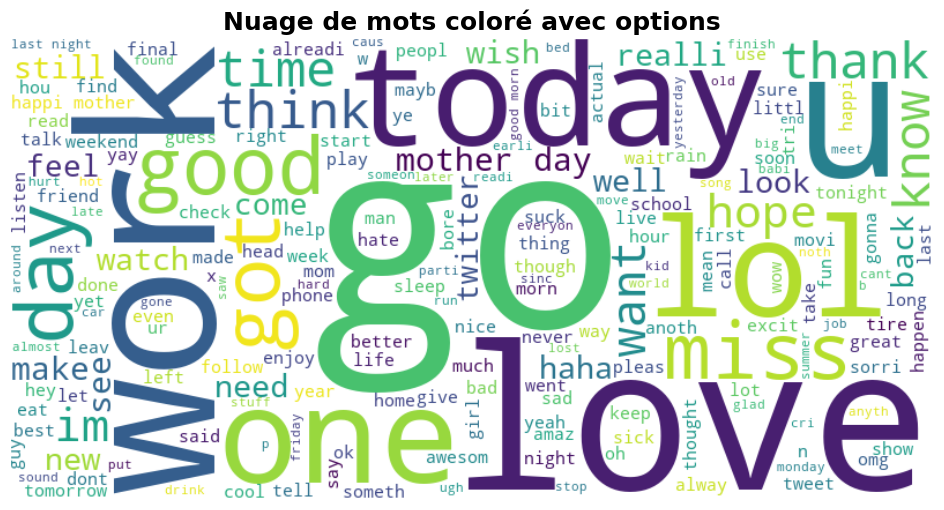

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Texte combiné
all_words = ' '.join(df['clean_text'])

# Générer le nuage de mots avec des couleurs aléatoires (colormap)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # palette de couleurs agréable
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
).generate(all_words)

# Afficher
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots coloré avec options", fontsize=18, weight='bold')
plt.show()



## Étape 8 : Vectorisation et Encodage des Labels

Les modèles de machine learning ne peuvent pas traiter directement le texte brut. On doit donc le convertir en une représentation numérique. On a utilisé `CountVectorizer` de scikit-learn pour transformer nos textes nettoyés en une matrice de comptage de tokens (Bag-of-Words). On a limité le nombre de features (mots) aux 5000 plus fréquents pour contrôler la dimensionnalité.
Parallèlement, les labels de sentiment ('positive', 'negative', 'neutral') sont également textuels. On a utilisé `LabelEncoder` pour les convertir en valeurs numériques (0, 1, 2), ce qui est nécessaire pour l'entraînement du modèle. On a affiché les classes encodées.


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Initialiser un CountVectorizer pour transformer le texte en vecteurs numériques (Bag-of-Words),
# en se limitant aux 5000 mots les plus fréquents
vectorizer = CountVectorizer(max_features=5000)

# Appliquer la vectorisation sur les textes nettoyés
X = vectorizer.fit_transform(df['clean_text'])

# Initialiser un LabelEncoder pour convertir les étiquettes textuelles en valeurs numériques
label_encoder = LabelEncoder()

# Appliquer l'encodage sur la colonne 'sentiment'
y = label_encoder.fit_transform(df['sentiment'])

# Afficher les classes textuelles d’origine et leur correspondance numérique
print(f" Classes encodées : {list(label_encoder.classes_)}")


 Classes encodées : ['negative', 'neutral', 'positive']


## Étape 9 : Séparation Entraînement/Test

Pour évaluer la performance de notre futur modèle sur des données qu'il n'a jamais vues, on a divisé notre jeu de données (les vecteurs `X` et les labels encodés `y`) en deux sous-ensembles : un ensemble d'entraînement (80% des données) et un ensemble de test (20% des données). On a utilisé la fonction `train_test_split` de scikit-learn, en fixant `random_state=42` pour assurer la reproductibilité des résultats.


In [9]:
from sklearn.model_selection import train_test_split

# On a divisé les données vectorisées (X) et les labels (y) en ensembles d'entraînement et de test
# 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Étape 10 : Entraînement du Modèle

On a choisi un modèle Naive Bayes Multinomial (`MultinomialNB`), qui est souvent performant pour les tâches de classification de texte avec des features de type comptage (comme notre Bag-of-Words). On a initialisé le modèle, puis on l'a entraîné en utilisant l'ensemble d'entraînement (`X_train`, `y_train`) avec la méthode `fit()`.


In [10]:
from sklearn.naive_bayes import MultinomialNB


# Initialisation du modèle
model = MultinomialNB()

# Entrainement du modèle sur les données d'entraînement
model.fit(X_train, y_train)



MultinomialNB()

## Étape 11 : Évaluation du Modèle

Après l'entraînement, on a évalué la performance du modèle sur l'ensemble de test (`X_test`), que le modèle n'avait jamais vu auparavant. On a d'abord fait des prédictions (`y_pred`) sur `X_test`. Ensuite, on a calculé et affiché plusieurs métriques d'évaluation :
- L'**Accuracy** : la proportion de prédictions correctes.
- Le **Rapport de Classification** : qui donne la précision, le rappel et le F1-score pour chaque classe (positive, negative, neutral).
- La **Matrice de Confusion** : qui montre le détail des prédictions correctes et incorrectes pour chaque classe (ex: combien de 'positive' ont été prédits comme 'negative').


In [11]:
from sklearn.metrics import accuracy_score


# Là on fait des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Puis on calcule l'accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))


Accuracy : 0.6350072780203785


## Étape 12 : Test sur des Exemples Concrets

Pour tester le modèle de manière plus intuitive, on a défini une fonction `predict_sentiment`. Cette fonction prend une phrase en entrée, applique la même fonction de nettoyage `preprocess_text` que celle utilisée pour l'entraînement, vectorise le texte nettoyé avec le `vectorizer` déjà entraîné, utilise le `model` entraîné pour prédire le label numérique, et enfin utilise le `label_encoder` pour reconvertir le label numérique en texte ('positive', 'negative' ou 'neutral').
On a ensuite testé cette fonction sur quelques phrases exemples pour voir le sentiment prédit par notre modèle.


In [12]:
#Là on Définit une fonction pour prédire le sentiment d’un texte donné
def predict_sentiment(text):
    # D’abord, nettoie le texte en utilisant la même fonction que lors de l’entraînement
    clean = preprocess_text(text)
    # Puis, vectorise le texte nettoyé avec le vectorizer déjà entraîné
    vect = vectorizer.transform([clean])
    # Ensuite, prédis le label numérique avec le modèle
    pred = model.predict(vect)
    # Enfin, convertis le label numérique en étiquette textuelle
    return label_encoder.inverse_transform(pred)[0]

# Définis quelques phrases exemples pour tester le modèle
examples = [
    "I hate this product, it’s a complete disaster.",         # negative
    "This is fantastic, I highly recommend it!",              # positive
    "Not bad at all, but I expected better quality.",         # neutral
    "I absolutely love it, works perfectly every time!",      # positive
    "Terrible experience, I will never buy this again."       # negative
]


# Applique la fonction de prédiction sur chaque exemple et affiche le résultat
print("Test du modèle sur des phrases exemples:")
for text in examples:
    sentiment = predict_sentiment(text)
    print(f'Texte : "{text}" Sentiment prédit: {sentiment.capitalize()}')


Test du modèle sur des phrases exemples:
Texte : "I hate this product, it’s a complete disaster." Sentiment prédit: Negative
Texte : "This is fantastic, I highly recommend it!" Sentiment prédit: Positive
Texte : "Not bad at all, but I expected better quality." Sentiment prédit: Neutral
Texte : "I absolutely love it, works perfectly every time!" Sentiment prédit: Positive
Texte : "Terrible experience, I will never buy this again." Sentiment prédit: Negative
